# **SoccerNet: A Scalable Dataset for Action Spotting in Soccer Videos**


# Motivation: From Classroom Curiosity to Research Inquiry

The idea for this exploration emerged during one of our MultiModal Data Processing CLasses at IIT Guwahati led by **Prof. Neeraj Sharma** . In that session, we were discussing real-world applications of video understanding, and a compelling question was raised:

> *"How can we build an automatic highlight generator for a full-length sports match?"*

This question struck me as both simple and deceptively deep. At first glance, generating highlights seems like a matter of slicing up interesting clips. But the moment we started thinking about what makes a moment interesting—especially from a computational standpoint—the real complexity surfaced. Soccer, as a sport, is filled with subtle nuances, tactical build-ups, and highly sparse events. Identifying and extracting these key moments is far from trivial.

This line of inquiry led me to search for datasets that could support research into such problems. That’s when I came across **SoccerNet**, a dataset specifically tailored to the domain of soccer video understanding. It provided exactly what I was looking for: full-length games with precise temporal annotations of critical events like goals, yellow/red cards, and substitutions. More importantly, it introduced a challenging and underexplored problem—**action spotting in long-form videos**.

## Why Soccer?

Soccer presents an ideal domain for studying action recognition and temporal reasoning. Unlike short, edited video clips, a soccer match is a continuous 90-minute stream with relatively few labeled events. This creates a sparse supervision scenario, which is often more realistic yet harder than the heavily supervised, short-video settings seen in traditional datasets.

Moreover, soccer follows a structured format governed by clear rules and consistent patterns. The presence of a well-defined timeline, predictable event types, and synchronized video and event logs makes it a fertile ground for experimenting with algorithms that need to model long-term dependencies, causal reasoning, and multi-agent behavior.

## Limitations of Existing Datasets

Before SoccerNet, datasets like **ActivityNet**, **Kinetics**, and **THUMOS** were widely used for action recognition and localization. While they are invaluable to the field, they suffer from a few limitations in the context of sports highlight generation:

- They often contain **short, trimmed clips** instead of continuous footage.
- Annotations are typically dense in the time window, unlike the **sparse but crucial events** in sports.
- They lack the **contextual and strategic structure** inherent in sports like soccer.

These limitations made it clear that generic datasets weren't suitable for solving the kind of problems I was interested in.

## The Role of SoccerNet

**SoccerNet** fills this crucial gap by offering a domain-specific, large-scale dataset focused on **temporal event spotting**. With its aligned match reports, full-length game footage, and high-quality annotations, it enables researchers to focus on questions such as:

- When does a significant event happen, and how can a model predict it?
- How can temporal context before and after an event be modeled effectively?
- What kinds of architectures are best suited to detect sparse, high-impact moments in continuous streams?

In sum, the motivation behind studying SoccerNet was both academic and applied. From a technical perspective, it offered an exciting opportunity to explore long-form video understanding. From a practical standpoint, it aligned closely with real-world applications like automatic highlight generation, intelligent sports analytics, and temporal segmentation. What began as a classroom discussion evolved into a compelling research direction.


# **How SoccerNet Was Created: Building a Scalable Sports Dataset**

The creation of **SoccerNet** was driven by a pressing need in the research community: a large-scale, temporally annotated dataset that focuses on **long-form video understanding** in a structured domain like soccer. Unlike generic action recognition datasets, the goal here was not just to recognize actions, but to **spot specific events in continuous, untrimmed video streams**.

## Initial Motivation Behind the Dataset

The researchers behind SoccerNet observed a key limitation in existing benchmarks. Most action recognition datasets, such as UCF101 or Kinetics, rely on **trimmed clips** and densely annotated short videos. However, real-world scenarios—especially sports broadcasts—are long, untrimmed, and involve **sparse but semantically rich events**.

In professional soccer, events like goals, substitutions, and yellow/red cards are significant but **occur infrequently over 90+ minutes**. Recognizing such events requires models to understand long-range temporal dependencies, player dynamics, and scene context—challenges not addressed by typical datasets.

Thus, the SoccerNet creators envisioned a dataset that could support both supervised learning and benchmark real-world temporal spotting challenges.

## Data Collection Pipeline

The dataset construction was methodical and scalable. Here's a breakdown of the core pipeline used to curate SoccerNet:

### 1. **Video Source Acquisition**
- Full-length soccer match videos were sourced from **broadcast recordings**.
- The initial release focused on **500 complete matches** from the **English Premier League (EPL)** between 2014–2018.

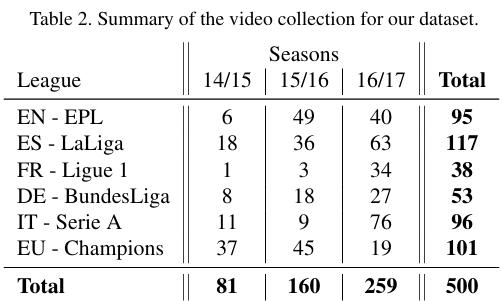
### 2. **Event Log Alignment**
- Official **match reports from sports media** (e.g., WhoScored, BBC Sports) were crawled and used to extract **event logs**, including:
  - Goals
  - Yellow cards
  - Red cards
  - Substitutions
- These reports included **event types and minute-level timestamps**, which needed further refinement.
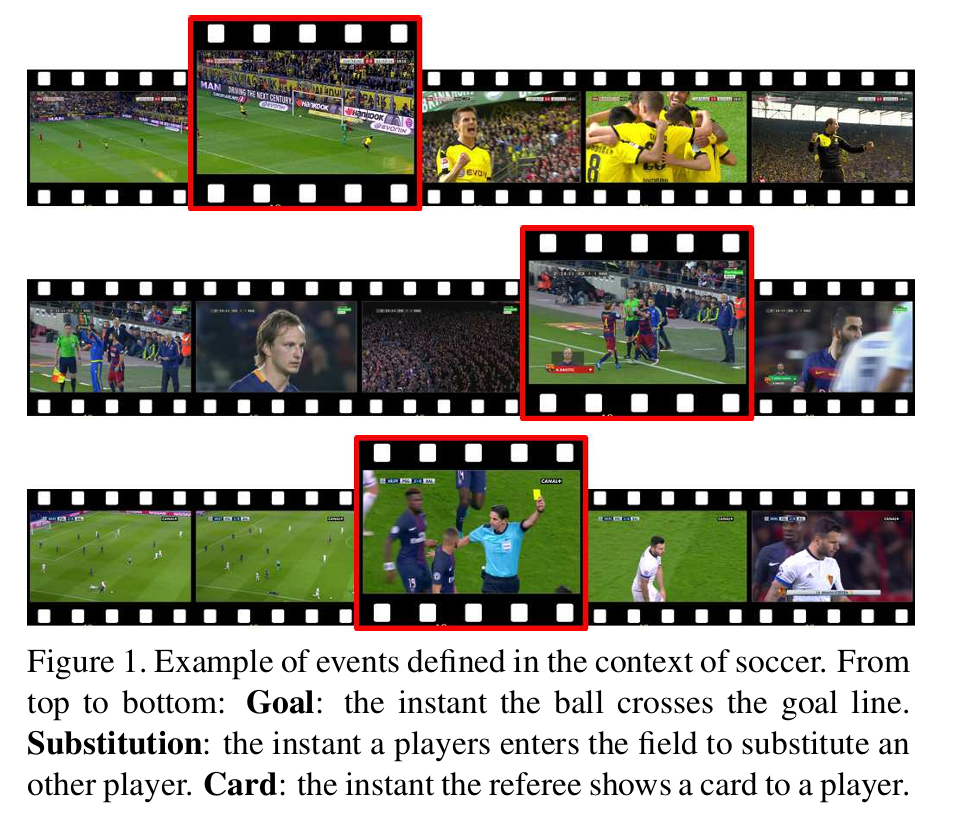
### 3. **Timestamp Refinement**
- The video streams often include **pre-game/post-game content**, advertisements, and replays, which makes aligning match logs with raw video timestamps non-trivial.
- A **heuristic-based synchronization** was implemented:
  - Referees’ whistles
  - Scoreboard changes
  - Crowd reactions
- Manual annotation and validation were performed to fine-tune event timestamps to within a **one-second resolution** of the true event occurrence.

### 4. **Annotation Format**
- The curated dataset uses a **JSON-based annotation format**, where each event is described as:
  ```json
  {
    "gameTime": "2nd half 13:47",
    "label": "Goal",
    "position": 3432.7,
    "video_id": "game_001",
    "half": 2
  }
  * The `position` field specifies the **event's time in seconds** from the start of the video file.

### 5. **Temporal Context Generation**

* In addition to spotting single timestamps, temporal windows (e.g., ±30 seconds) were also constructed to train and test models on **local context understanding**.
* These windows were crucial for training **action localization and spotting networks**.

# **Dataset Statistics**

* **500 matches** amounting to over **764 hours** of footage.
* Over **12,000 annotated events**.
* Event breakdown (approximate counts):

  * Goals: \~1,600
  * Yellow cards: \~5,000
  * Red cards: \~500
  * Substitutions: \~5,000

## Release and Versioning

The initial release was part of the paper **“SoccerNet: A Scalable Dataset for Action Spotting in Soccer Videos”** presented at CVPR. Since then, newer versions like **SoccerNet-v2** and **SoccerNet-v3** have been released, which include:

* New event types (offsides, penalties)
* Multi-view camera footage
* Player tracking and pose estimation
* Audio streams and commentary alignment

Each release aimed to incrementally build toward a **multi-modal, multi-task benchmark suite** for comprehensive soccer video understanding.

---

In essence, the creation of SoccerNet was a carefully crafted process involving synchronization between structured external event logs and unstructured video data, refined by temporal alignment techniques and validated with manual checks. The resulting dataset provides a unique and realistic testbed for advancing temporal event detection, long-term video understanding, and multimodal learning in sports AI.

```



## Data Representation of SoccerNet: How the Data is Structured

The **SoccerNet** dataset is meticulously organized to support various tasks such as **action spotting**, **event detection**, and **temporal reasoning**. This section explains how the data is represented, making it easier for researchers to interact with the dataset for model training, evaluation, and testing.

## 1. **Video Representation**
Each match in the SoccerNet dataset is represented as a full-length video file, which is the core component of the dataset. The video is untrimmed and corresponds to a complete soccer match, typically lasting 90 minutes or more.
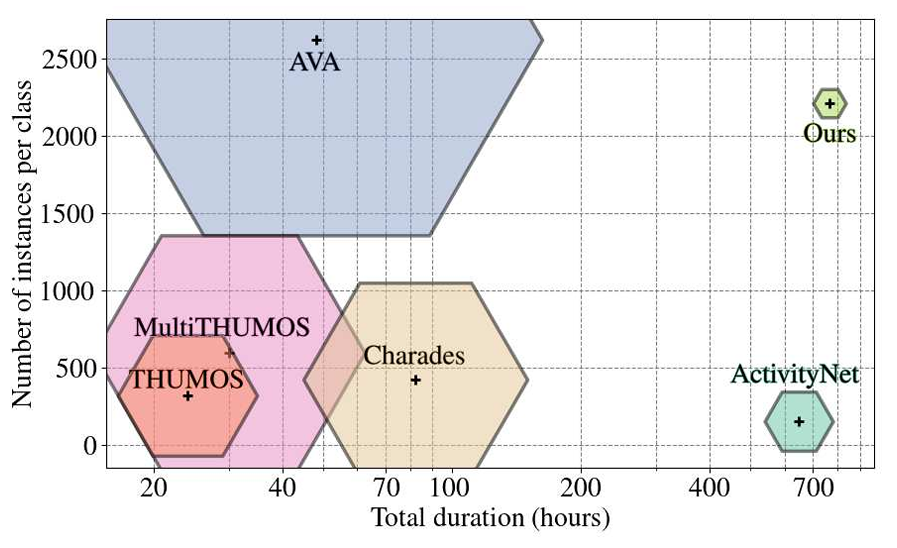
- **Video Format**: MP4
- **Resolution**: High-definition (1080p)
- **Video Identifier**: Each match video is uniquely identified by a **video_id**.

### Video Structure
- The video file corresponds to an entire match from the start to the end, including half-time breaks, post-match commentary, etc.
- Specific events within the video are annotated based on **timestamp accuracy**, marking significant moments like goals, cards, substitutions, etc.
  
## 2. **Event Annotations**

Each key event (goal, yellow card, red card, substitution) within the video is carefully annotated with the exact timestamp when the event occurs. The event annotations serve as the foundation for tasks such as event detection, action spotting, and highlight generation.

### Annotation Format
The event annotations in SoccerNet are provided in **JSON** format. Each event contains the following fields:

- **gameTime**: The time in the match when the event occurred (e.g., “1st Half 12:34”).
- **label**: The type of event (e.g., Goal, Yellow Card, Substitution).
- **position**: The position in the video (in seconds) at which the event occurs.
- **video_id**: A unique identifier for the match video to associate the annotation with a specific match.
- **half**: Indicates whether the event occurred in the first or second half of the game.

#### Example Annotation
Here’s a sample annotation as also disussed above for a goal event:
```json
{
  "gameTime": "1st Half 12:34",
  "label": "Goal",
  "position": 754.3,
  "video_id": "game_001",
  "half": 1
}
````

### Temporal Context

Each event annotation also includes a **temporal window** to provide context around the event. This temporal window typically spans **±30 seconds** before and after the event. This helps models learn not only the event itself but also its **contextual cues** such as player positioning, crowd reaction, or tactical buildup.

## 3. **Meta-Data Representation**

In addition to the video and event annotations, the dataset contains important **meta-data** that gives context to each match and event. This data helps researchers understand the match beyond the raw footage, making it easier to link events with strategic aspects of the game.

### Meta-Data Fields

* **Teams**: Information about the teams playing, including team names and line-ups.
* **Players**: Data about individual players such as their positions, goals scored, yellow/red cards, etc.
* **Match Reports**: Detailed game statistics, including possession, shots, and key moments.
* **Player Tracking**: Spatial and temporal tracking data for players on the field.

The meta-data is typically stored in CSV, JSON, or other tabular formats and is associated with each match video by its `video_id`.

## 4. **Multi-View and Additional Data**

Some versions of SoccerNet provide videos shot from multiple camera angles. This additional data can be used for experiments involving **multi-view learning**, where researchers explore how different perspectives impact action recognition or event detection.

* **Camera Views**: Multiple synchronized views of the same match, offering a richer set of features for models that require spatial understanding from different perspectives.
* **Player Tracking**: Player positions are recorded for each frame of the video, allowing for **spatial reasoning** about player movements and interactions during events.

## 5. **Data Organization and File Structure**

The SoccerNet dataset is organized in a hierarchical folder structure to ensure easy access to videos, annotations, and meta-data. A typical directory structure looks like:

```
SoccerNet/
│
├── videos/                # Folder containing full-length match videos
│   ├── game_001.mp4       # Match video
│   ├── game_002.mp4       # Another match video
│   └── ...
│
├── annotations/           # Folder containing event annotations in JSON format
│   ├── game_001.json      # Annotations for the first match
│   ├── game_002.json      # Annotations for the second match
│   └── ...
│
├── metadata/              # Folder with match meta-data (teams, players, stats)
│   ├── game_001_meta.json
│   ├── game_002_meta.json
│   └── ...
│
└── multi_views/           # Folder containing different camera angles (optional)
    ├── game_001_view_1.mp4
    ├── game_001_view_2.mp4
    └── ...
```
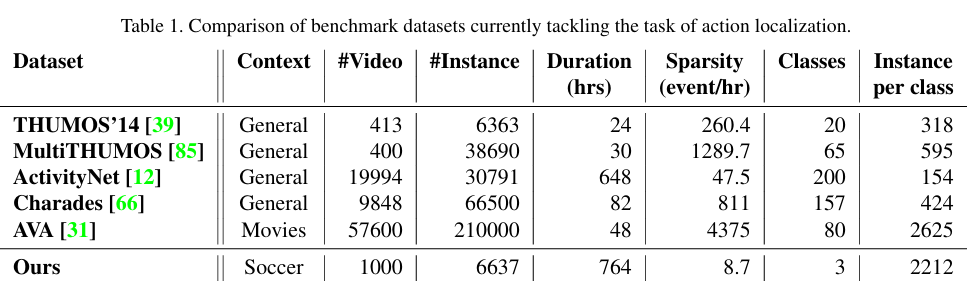



# **Highlight Generation: A Technical Perspective Using SoccerNet**

The challenge of **highlight generation** in soccer videos is deeply rooted in the complexities of **event detection**, **temporal reasoning**, and **contextual understanding**. While generating short highlight reels may seem simple, the technical hurdles lie in identifying significant moments, maintaining the temporal flow, and creating a cohesive summary from long-form videos. **SoccerNet** is an ideal dataset for this task due to its unique structure and annotations that focus on the precise timing of key events in full-length soccer matches.

## Why SoccerNet is Best Suited for Highlight Generation

SoccerNet provides several advantages over traditional video datasets when it comes to highlight generation in soccer:

### 1. **High-Quality Annotations**
The SoccerNet dataset contains **precise temporal annotations** for key events such as goals, yellow/red cards, substitutions, and other significant moments. This detailed labeling is crucial for training models to detect specific events in soccer, ensuring that highlight generation systems can reliably extract clips of interest.

### 2. **Long-Form Video**
Unlike datasets such as **Kinetics** or **ActivityNet**, which contain short video clips, **SoccerNet** consists of full-length, continuous soccer matches. This is critical for highlight generation, as it allows models to learn from a longer temporal span and develop a sense of the game’s flow, enabling the detection of significant moments within a broader context.

### 3. **Sparse Event Annotations**
SoccerNet is an excellent resource for studying sparse event detection, where important moments (goals, cards, substitutions) occur infrequently. Highlight generation models must be able to identify these sparse events within long-form videos and appropriately condense them into an engaging summary. This matches the structure of SoccerNet, making it an ideal dataset for training and evaluation.
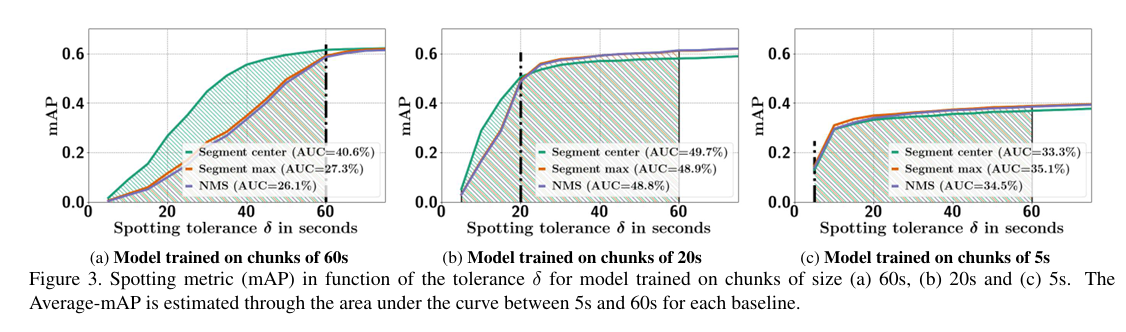
## Technical Approaches to Highlight Generation

Several advanced techniques can be employed to generate highlights from soccer videos. These methods require careful handling of the video's temporal nature, as well as effective strategies to handle sparse events.

### 1. **Event-Driven Highlight Generation**
Event-driven highlight generation is the simplest method, where a model focuses on detecting predefined key events (such as goals or yellow cards) and extracts clips surrounding those moments.

#### Process:
- **Detection**: The model identifies key moments based on the annotations in SoccerNet.
- **Extraction**: It extracts short clips around these moments (e.g., 10-30 seconds before and after a goal).
- **Challenge**: This method does not consider the surrounding context or the buildup to the event, leading to possibly disjointed highlights.

#### Why SoccerNet Works:
- The precise **temporal annotations** allow the model to know exactly where events like goals happen, making event-driven extraction straightforward.

### 2. **Context-Aware Highlight Generation**
A more sophisticated approach is to generate highlights by considering the **temporal context** around key events. For example, instead of simply showing the goal, a model might also include the moments leading up to it—like a key pass, a dribble, or a strategic move by players.

#### Process:
- **Temporal Windowing**: A model can be trained to extract not just the event itself but also a window of time before and after the event to maintain the action's flow (e.g., a ±30-second window around the goal).
- **Contextual Significance**: The model would also assess the surrounding context, such as the importance of a goal based on game state (e.g., a last-minute goal in a tied game might be more significant than one in a blowout).

#### Why SoccerNet Works:
- **Contextual information** in the form of **detailed annotations** for each event helps to identify key moments that require context. SoccerNet's **full-length game footage** allows the model to maintain continuity and context throughout the match.

### 3. **Deep Learning-Based Highlight Generation**
Advanced models like **Recurrent Neural Networks (RNNs)**, **Long Short-Term Memory (LSTM)** networks, and more recently, **Transformer-based models** can be used to learn the sequence of actions leading to significant events. These models capture the temporal dependencies in soccer matches and can generate highlights not just by detecting events but by learning what moments lead to excitement or significance.

#### Process:
- **Sequence Learning**: The model processes the entire video as a sequence, learning how sequences of actions (e.g., player movements, passes, and tactical shifts) culminate in key events.
- **End-to-End Training**: The model is trained to output highlight clips by learning to identify sequences of actions that are deemed important, rather than just focusing on isolated events.

#### Why SoccerNet Works:
- **Long-form video** provides rich temporal context, which is crucial for sequence-based models. SoccerNet’s structure allows these models to learn from the entire flow of a game, instead of being limited to short video clips, making it an ideal dataset for learning dynamic sequences.

### 4. **Player-Centric Highlight Generation**
Another interesting avenue is creating **player-centric highlights**. These highlights would focus on key actions involving specific players (e.g., goals, assists, defensive actions).

#### Process:
- **Player Tracking**: SoccerNet provides player tracking data, which can be used to focus on specific players' actions. The model can identify moments when the player is involved in a key event, such as scoring a goal or making an assist.
- **Personalized Highlights**: Fans or analysts may want to see highlights focused on a single player's contribution throughout a match.

#### Why SoccerNet Works:
- SoccerNet’s **detailed player-level annotations** make it easy to track individual player actions and extract clips that focus solely on a player's performance, which is key to creating personalized highlight reels.



# **SoccerNet Challenge: Expanding the Dataset and Notable Winning Solutions**

## Introduction to the SoccerNet Challenge

The **SoccerNet Challenge** is an annual competition that showcases the latest advances in the field of soccer video analysis. It specifically focuses on tasks such as **action spotting**, **highlight generation**, and **event detection** in soccer videos. By providing a publicly available platform for researchers and developers, the challenge encourages the development of state-of-the-art models for real-world sports applications.

The goal of the SoccerNet Challenge is to push the boundaries of video understanding by solving the complex problem of identifying, localizing, and understanding important soccer events within long-form match videos. Over the years, it has become an important benchmark for evaluating the performance of video analysis models in the sports domain.

## Expanding the SoccerNet Dataset

Since its inception, the **SoccerNet dataset** has been evolving to include more diverse and comprehensive data to facilitate the challenge tasks. The key ways in which the dataset is expanding are:

### 1. **Increasing the Number of Matches**
The initial version of SoccerNet featured data from a limited number of soccer games, mostly from European competitions. However, with each new version of the dataset, more **matches from different leagues** and **global tournaments** have been added, including top European leagues like the **Premier League**, **La Liga**, and **Serie A**, as well as **international competitions** like the **FIFA World Cup** and **UEFA Champions League**.

### 2. **More Granular Annotations**
The SoccerNet dataset has expanded its **event annotations**, which now cover a broader range of soccer events:
- **Goals**
- **Substitutions**
- **Yellow/Red cards**
- **Offside calls**
- **Corner kicks** 
- **Free kicks**
- **Player-related events**

These annotations allow for the fine-grained detection and localization of these events, making the task of action spotting more challenging and meaningful.

### 3. **Player Tracking and Statistics**
Recent updates to the SoccerNet dataset have introduced **player tracking data**, allowing researchers to follow individual player movements throughout the match. Additionally, **player performance statistics** are available, providing further context to each event. This expansion opens up possibilities for **player-centric analyses** and the development of **personalized highlight generation models**.

### 4. **Multilingual and Multi-Cultural Coverage**
To address the international nature of soccer, the SoccerNet dataset now includes **match commentary** in multiple languages. This is important for enhancing the robustness of models, particularly in understanding context through natural language, which can be used to infer match intensity or emotional context based on commentary tone.

## The SoccerNet Challenge: Notable Winning Solutions

Each year, teams from across the globe compete in the **SoccerNet Challenge**, presenting innovative solutions to the core problems of action spotting and highlight generation. Below are a few notable winning solutions and trends that have emerged:

### 1. **Deep Learning-based Action Spotting Models**
One of the most successful approaches in recent SoccerNet Challenge solutions involves **deep learning-based models**, particularly using **Convolutional Neural Networks (CNNs)**, **Recurrent Neural Networks (RNNs)**, and **Transformer models**. These models excel at learning complex spatiotemporal dependencies in long-form video sequences.

- **Winning Approach**: Some teams used hybrid models, combining CNNs for feature extraction from video frames with RNNs or Transformers to handle the temporal aspect of the video. These models achieved high accuracy in detecting events like goals and red cards by learning patterns in the action over time.
  
- **Key Insight**: A major breakthrough has been the integration of **multi-modal learning**, where both visual and textual data (e.g., match commentary) are used to enhance predictions. This is crucial for understanding the temporal flow and emotional context of events, providing a more holistic approach to action spotting.

### 2. **Temporal Attention Mechanisms**
Several winning solutions incorporated **attention mechanisms** to focus on the most relevant time frames within a match. By using temporal attention, these models could focus on key moments that were more likely to contain significant events, allowing for more efficient action spotting.

- **Winning Approach**: Teams used **self-attention** mechanisms to weigh different parts of the video sequence, prioritizing frames that were more likely to contain important events. This was especially effective in detecting events in the sparse, long-form soccer videos.

- **Key Insight**: Temporal attention allowed models to handle the **long-duration** nature of soccer matches more effectively, filtering out irrelevant parts of the video while maintaining focus on critical events, such as goals or fouls.

### 3. **End-to-End Highlight Generation**
Some teams proposed **end-to-end solutions** that directly tackled the problem of highlight generation, rather than just action detection. These models went beyond identifying key moments and generated cohesive highlight reels by selecting the most interesting moments and arranging them into a video summary.

- **Winning Approach**: One approach used **generative adversarial networks (GANs)** to produce highlight videos, where the generator model created highlight clips and the discriminator model ensured the relevance and quality of the generated highlight reel. 

- **Key Insight**: Highlight generation models often incorporated **reinforcement learning** to ensure that the highlight reel maximized user engagement, taking into account factors like **emotional impact** and **game context** (e.g., a goal in a crucial match may be more exciting than a goal in a blowout game).

### 4. **Multimodal Integration for Enhanced Detection**
Some top-performing solutions went beyond just visual data, integrating **multimodal inputs** such as:
- **Audio**: Incorporating crowd noise or commentator reactions to determine the emotional intensity of moments.
- **Player Statistics**: Using real-time player performance metrics (e.g., distance run, passes completed) to add context to the action.

- **Winning Approach**: By combining visual features with **audio signals** (e.g., cheers, commentary) and **player data**, these models improved the detection of significant events and better understood the importance of moments in the match.

- **Key Insight**: This integration of multimodal data showed promise for creating systems that not only detect events but also understand the **context** and **emotional significance** of those events within the flow of the game.

## Conclusion

The **SoccerNet Challenge** has played a pivotal role in advancing the field of **soccer video understanding**. By expanding the dataset to include more diverse matches, granular annotations, player tracking, and performance statistics, SoccerNet continues to push the boundaries of what is possible in automated sports video analysis.

Winning solutions from the SoccerNet Challenge have incorporated a range of techniques, from deep learning models to attention mechanisms and multimodal data integration. These advances have made great strides toward developing practical applications such as **automated highlight generation** and **real-time action spotting**. As the challenge continues to grow and the dataset expands, future solutions will likely incorporate even more sophisticated models that understand the broader context of soccer, including tactical formations, emotional moments, and fan interactions.

The continuous evolution of **SoccerNet** promises not only to enhance **automated highlight generation** but also to drive further innovations in **sports analytics** and **video-based AI**.
